In [3]:
%reset -f
import sys
sys.path.insert(0,'..')
from utils import *
from wavhandler import *
import os
import soundfile as sf
import matplotlib.pyplot as plt
from utils import np_hist, butter_highpass_filter

In [2]:
dataset = Dataset('test')
selection = 'NEW'
setting = 'spectrograms'

savepath = '/home/kalfasyan/Desktop/Pcfruit_light_experiments/{}'.format(selection)
if not os.path.isdir(savepath):
    os.mkdir(savepath)
subpath = savepath + '/{}/'.format(setting)
if not os.path.isdir(subpath):
    os.mkdir(subpath)

dataset.read(data=selection, loadmat=False)

NameError: name 'Dataset' is not defined

0
1
2
3
4
5
6
7
8
9
10
11
12
13


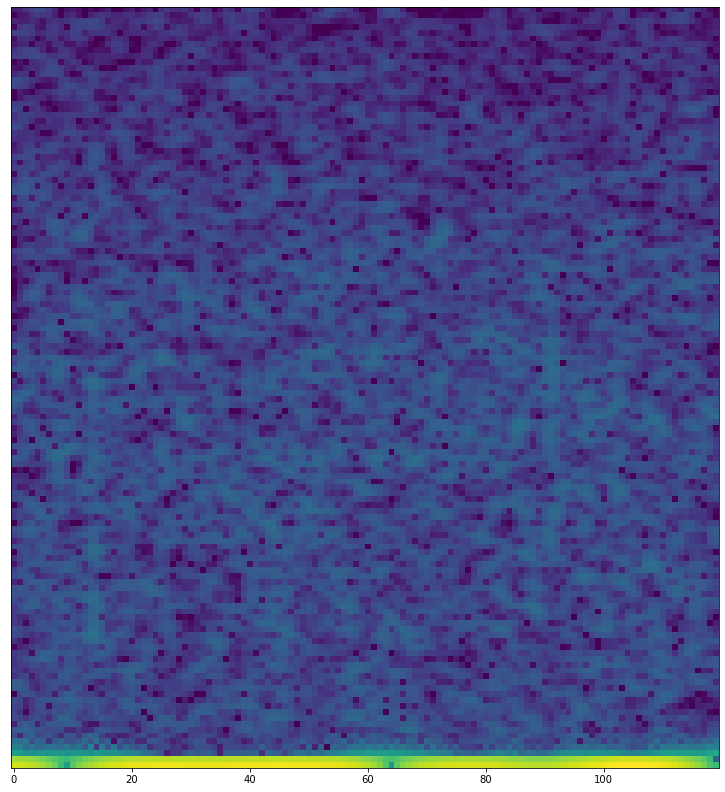

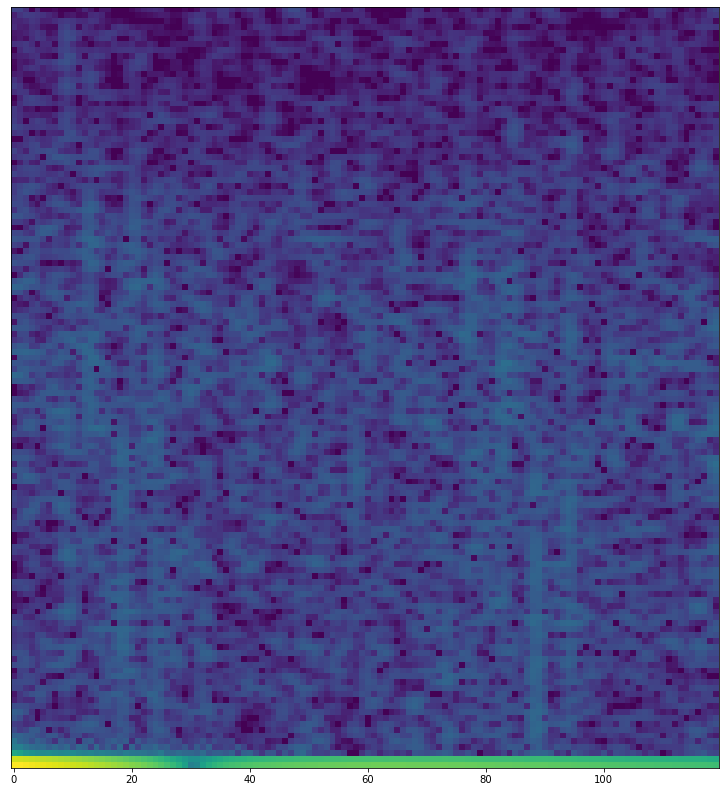

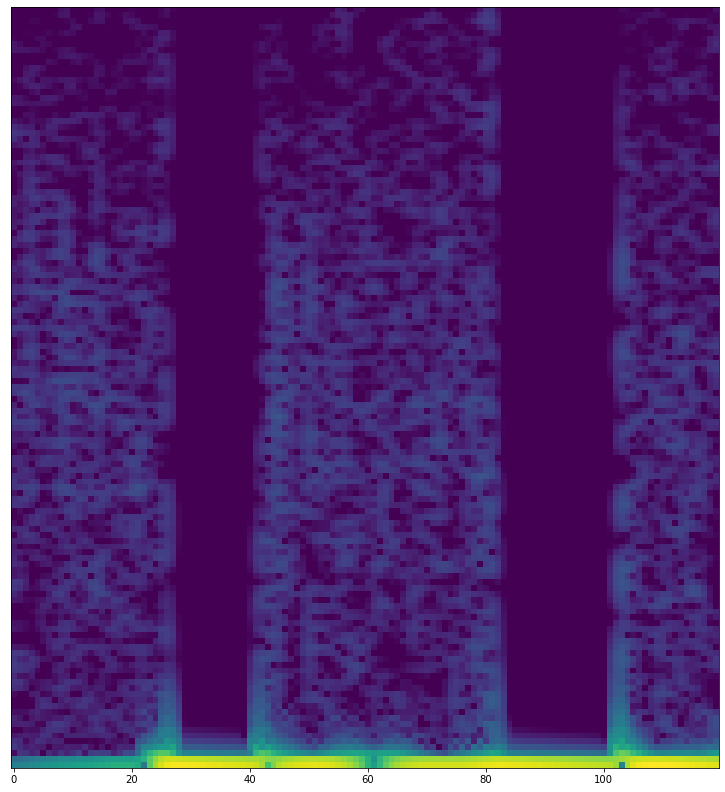

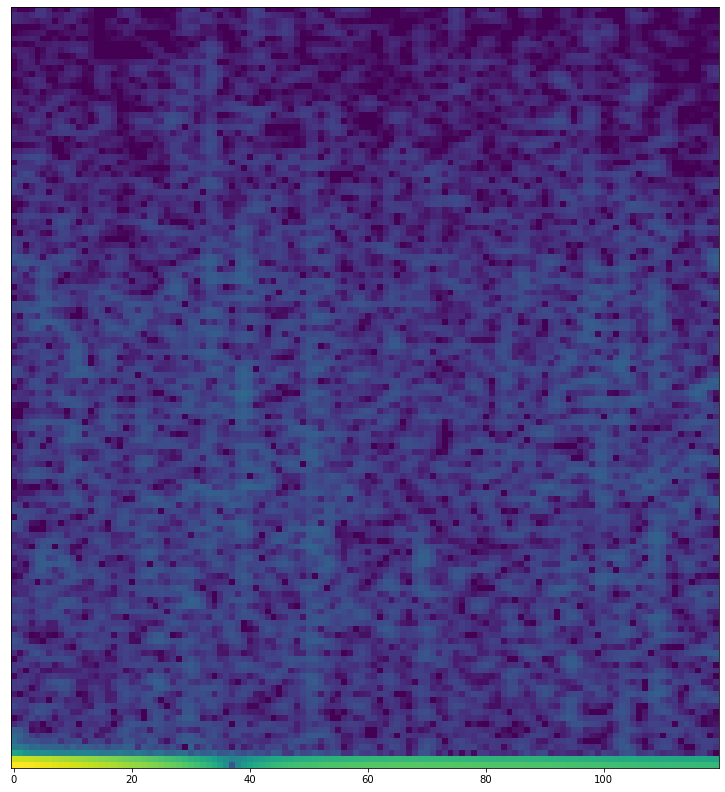

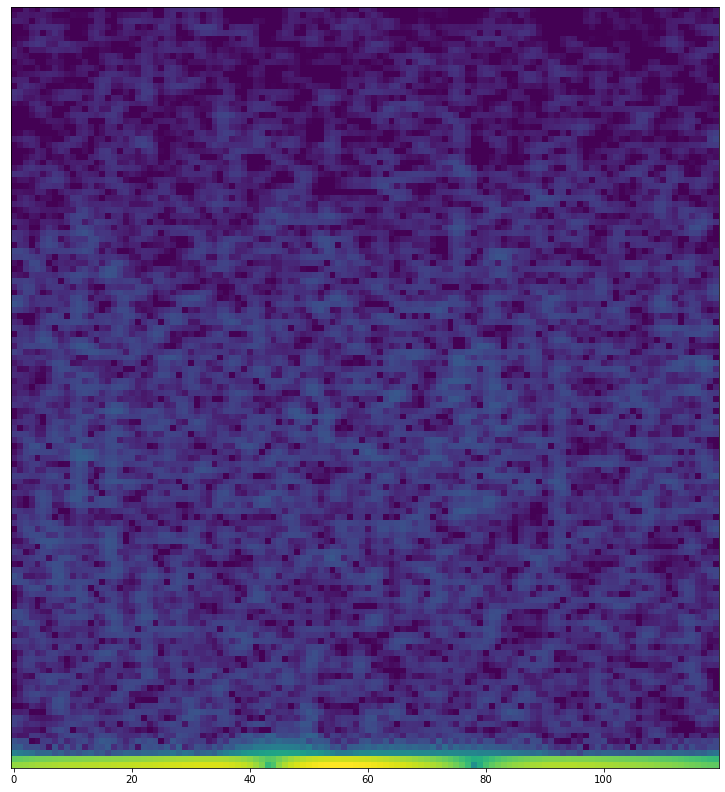

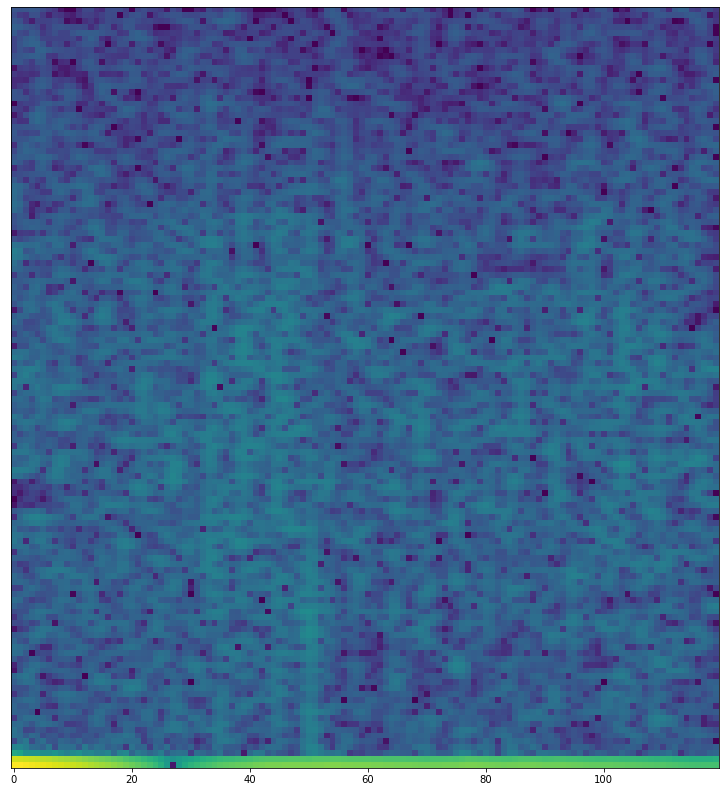

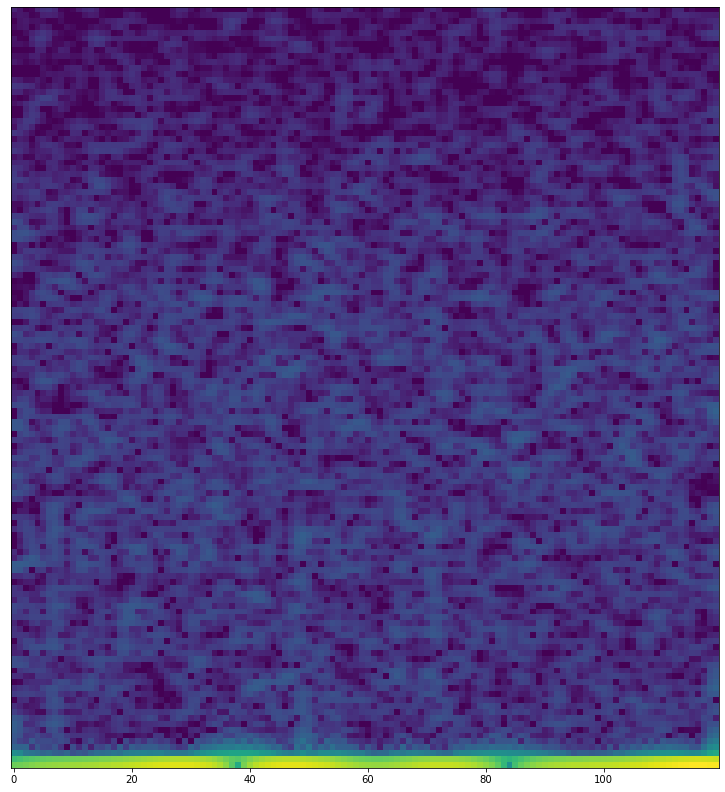

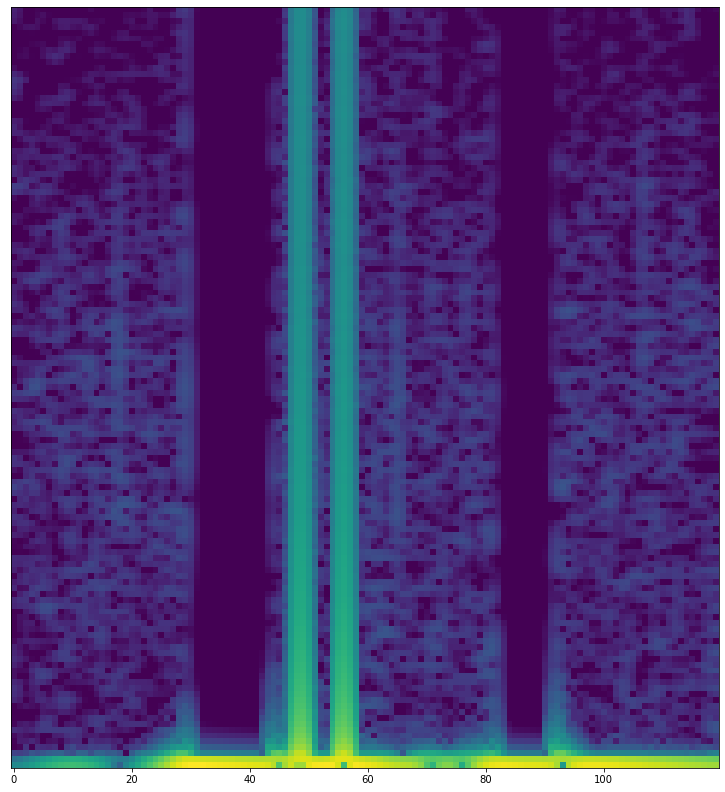

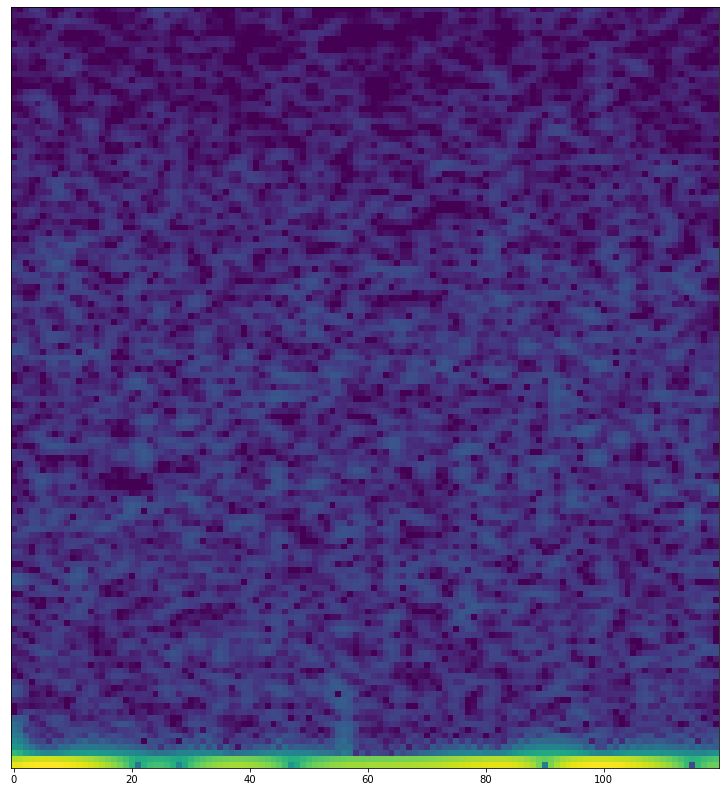

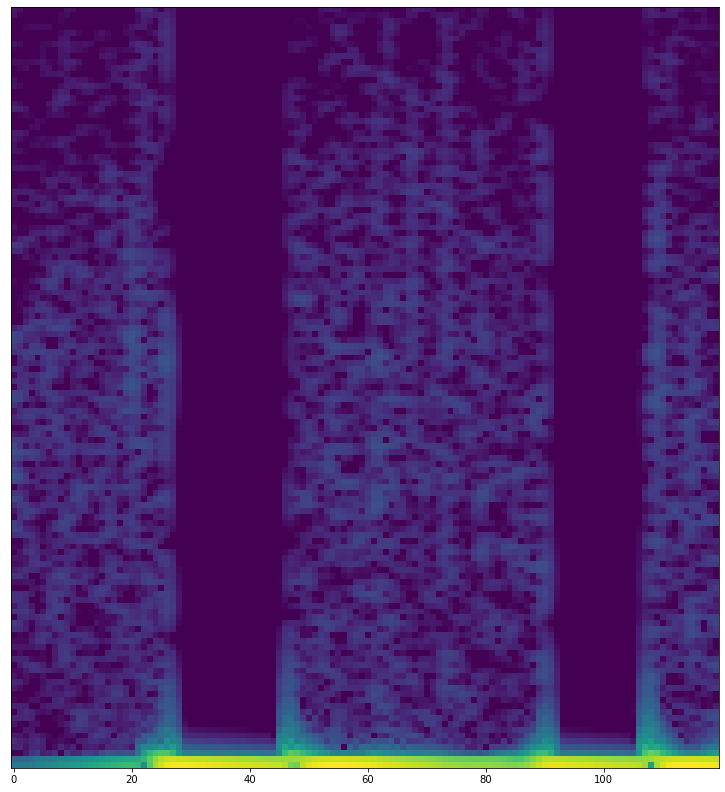

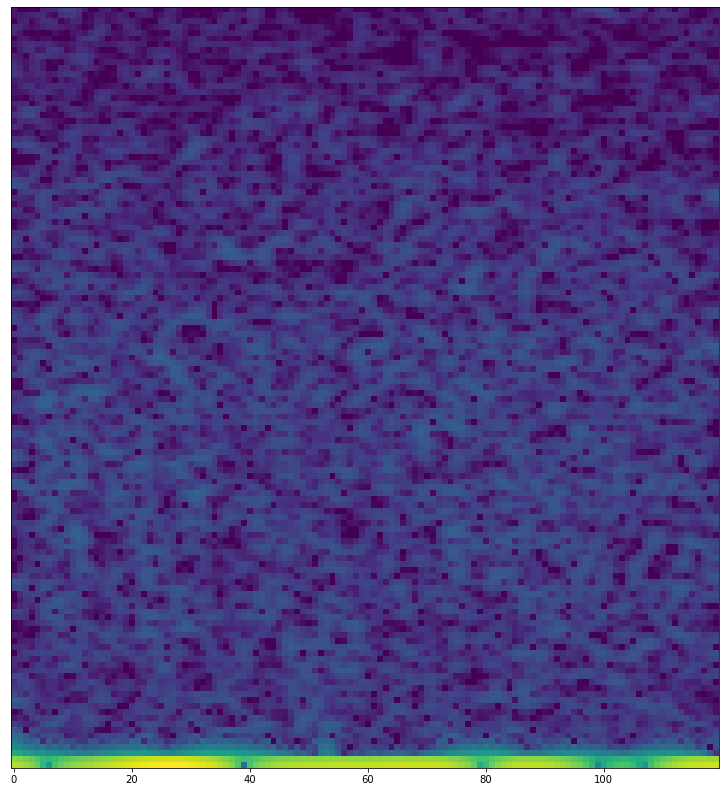

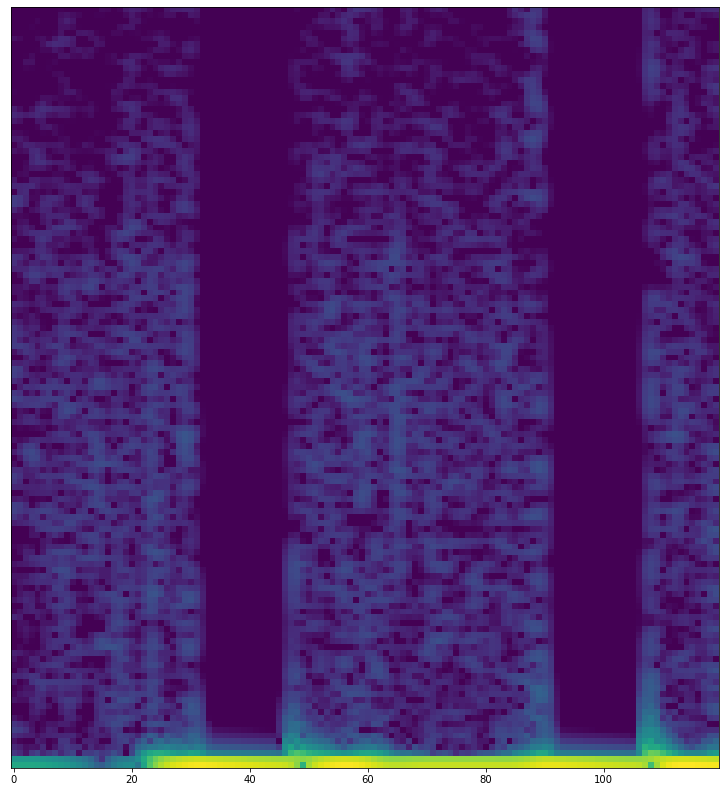

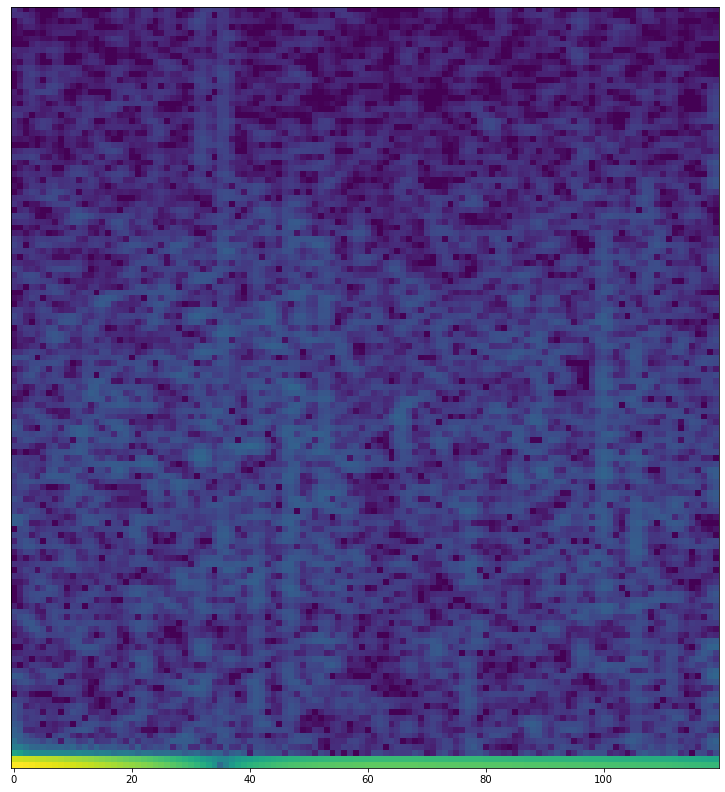

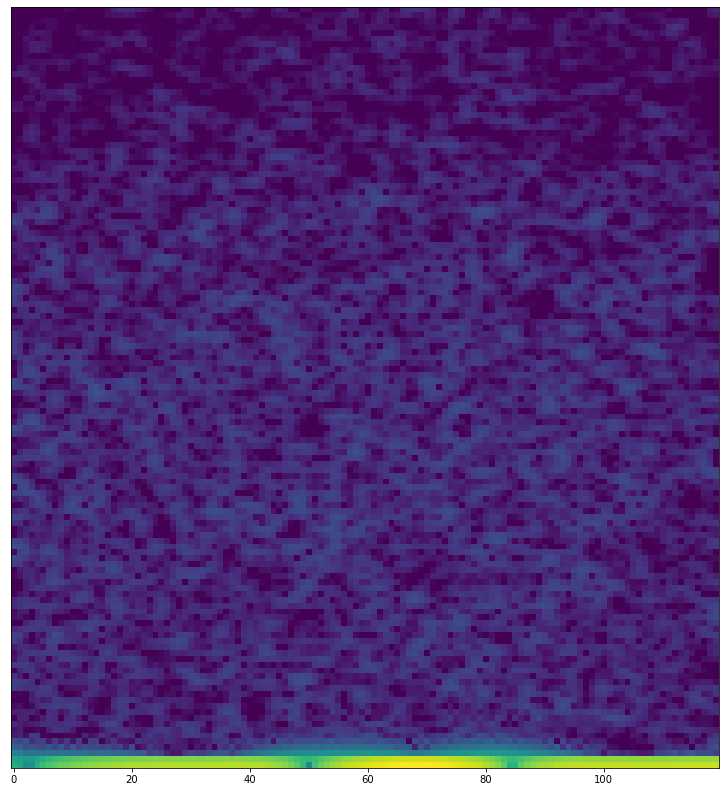

In [8]:
# %matplotlib widget

if setting == 'psd':
    zL = dataset.make_array(setting=setting).iloc[:,:300]
else:
    zL = dataset.make_array(setting=setting)
    
plt.close('all')
for i in range(zL.shape[0]):
    print(i)
    plt.figure(figsize=(24,14))
    
    if setting == 'raw':
        plt.plot(zL.iloc[i].values)
        plt.ylim(-.15,.15)
    elif setting == 'psd':
        ax = zL.iloc[i].plot()
        ax.set_xlabel('Frequency (Hz)')
    elif setting == 'spectrograms':
        tmp = zL.iloc[i].values.reshape((129,120))
        plt.imshow(tmp)
        plt.ylabel = 'Frequency (Hz)'
        plt.yticks([])
        plt.xlabel = 'Time (0 - 0.625secs)'
    else:
        ax = zL.iloc[i].plot()
        ax.set_xlabel('# samples')
#     plt.savefig(subpath+'{}_{}_{}.png'.format(selection,setting,i), format='png', bbox_inches = 'tight', pad_inches = 0)
#     plt.close()
#     if i > 25:
#         break

In [27]:
dataset.get_sensor_features()

In [15]:
dataset.df_features.groupby('datestr')

In [44]:
plt.figure()
dataset.plot_activity_times()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
%matplotlib widget

save = False

rdm = np.random.randint(0,raw.shape[0]) #7905 # 1495 # 9063 # 113 #106 # 148final
print(rdm)

point = 0
point2 = -1

sig = raw.iloc[rdm,point:point2].values
sig_series = pd.Series(sig)
filtered = butter_highpass_filter(sig, 180, fs=F_S, order=B_ORDER)

# RAW WAVEFORM
plt.figure(figsize=(20,15))
plt.plot(sig)
plt.ylim(-.15,.15)
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_raw.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

# ZOOMED RAW WAVEFORM
plt.figure(figsize=(20,15))
plt.plot(pd.Series(sig).iloc[1050:1450])
plt.ylim(-.12,.10)
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_zoom.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

psd_dB_series = pd.Series(transform_data(sig))
psd_dB_series.index = np.linspace(0,4096,129)

# PSD_dB 
plt.figure()
psd_dB_series.plot(figsize=(14,10), rot='vertical', grid=False)
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_psd_dB.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

# PSD_high quality
plt.figure()
z = power_spectral_density(data=raw.iloc[rdm,point:point2], noverlap=128+64, nperseg=256, nfft=8128)
psd_series = z.pow_amp.iloc[:800]
psd_series.index = z.frequency.iloc[:800]
psd_series.plot(rot=90, figsize=(14,10), grid=False, xticks=np.arange(0,800,10.))
if save:
    plt.savefig('/home/kalfasyan/Desktop/a_psd_full.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

# SPECTROGRAM
plt.figure(figsize=(10,10))
import librosa
spect = librosa.stft(raw.iloc[rdm,point:point2].values, n_fft = N_FFT, hop_length = HOP_LEN)
spect = librosa.amplitude_to_db(np.abs(spect))
plt.imshow(spect, origin='lower')

if save:
    plt.savefig('/home/kalfasyan/Desktop/a_spec.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

320


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
plt.figure()
spect = librosa.stft(raw.iloc[rdm,point:point2].values, n_fft = N_FFT, hop_length = HOP_LEN)
spect = np.abs(spect)
plt.imshow(spect, origin='lower')#, extent=[0,128,0,120])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [50]:
plt.close('all')